In [1]:
#Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the Excel file
file_path = 'Online Retail.xlsx'
data = pd.read_excel(file_path)

In [3]:
#Number of customers we have
print("Number of customers we have data for=" , len(data))

Number of customers we have data for= 541909


In [4]:
# Display the first few rows and basic information about the data
print(data.head())
print(data.info())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       -----------

In [5]:
# Check for null values in each column
null_values = data.isnull().sum()
print("Null values in each column:\n", null_values)

Null values in each column:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [6]:
# Remove rows with missing CustomerID values
data = data.dropna(subset=['CustomerID'])

# Drop the Description column, as it's not needed for clustering
data = data.drop(columns=['Description'])

# Confirm that missing values are handled
print("Null values after cleaning:\n", data.isnull().sum())
print("Data shape after cleaning:", data.shape)

Null values after cleaning:
 InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
Data shape after cleaning: (406829, 7)


In [7]:
print(data.duplicated().sum())

5227


In [8]:
# Remove duplicate rows
data = data.drop_duplicates()

# Confirm that duplicates are removed
print("Remaining duplicates:", data.duplicated().sum())
print("Data shape after removing duplicates:", data.shape)

Remaining duplicates: 0
Data shape after removing duplicates: (401602, 7)


In [9]:
# Create a TotalPrice feature
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Group by CustomerID to summarize customer purchase behavior
customer_data = data.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalPrice': 'sum'
}).reset_index()

# Display the first few rows of the aggregated customer data
print(customer_data.head())
print("Shape of customer data:", customer_data.shape)


   CustomerID  Quantity  TotalPrice
0     12346.0         0        0.00
1     12347.0      2458     4310.00
2     12348.0      2341     1797.24
3     12349.0       631     1757.55
4     12350.0       197      334.40
Shape of customer data: (4372, 3)


In [10]:
# Initialize the scaler
scaler = StandardScaler()

# Normalize Quantity and TotalPrice columns
customer_data[['Quantity', 'TotalPrice']] = scaler.fit_transform(customer_data[['Quantity', 'TotalPrice']])

# Display the first few rows of the normalized data
print(customer_data.head())


   CustomerID  Quantity  TotalPrice
0     12346.0 -0.239519   -0.230417
1     12347.0  0.286579    0.294087
2     12348.0  0.261537   -0.011703
3     12349.0 -0.104463   -0.016533
4     12350.0 -0.197354   -0.189723


In [11]:
# Initialize K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the model to the data
customer_data['Cluster'] = kmeans.fit_predict(customer_data[['Quantity', 'TotalPrice']])

# Display the first few rows with cluster assignments
print(customer_data.head())
print("Cluster centers:\n", kmeans.cluster_centers_)


   CustomerID  Quantity  TotalPrice  Cluster
0     12346.0 -0.239519   -0.230417        0
1     12347.0  0.286579    0.294087        0
2     12348.0  0.261537   -0.011703        0
3     12349.0 -0.104463   -0.016533        0
4     12350.0 -0.197354   -0.189723        0
Cluster centers:
 [[-0.06278401 -0.06014175]
 [20.48962714 23.60795438]
 [ 6.29757303  5.29538613]]


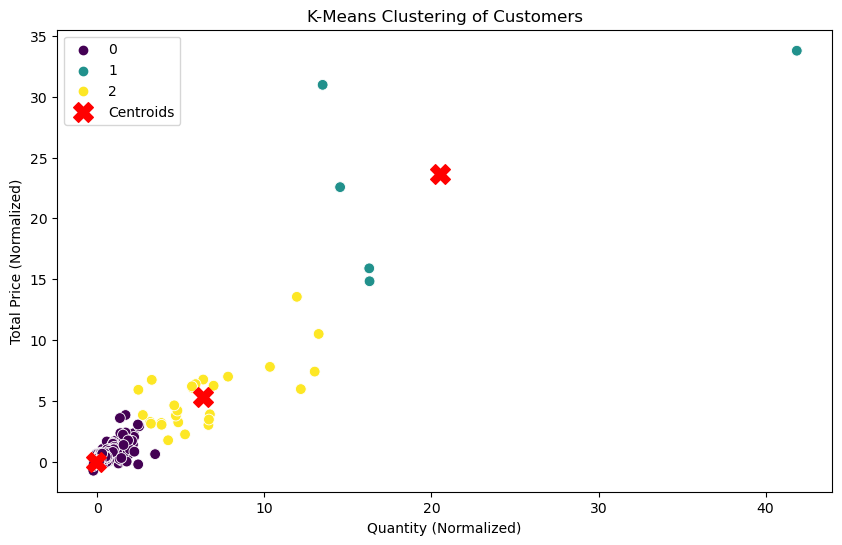

In [12]:
# Scatter plot of the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='Quantity', y='TotalPrice', hue='Cluster', palette='viridis', s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering of Customers')
plt.xlabel('Quantity (Normalized)')
plt.ylabel('Total Price (Normalized)')
plt.legend()
plt.show()


In [13]:
pip install --upgrade threadpoolctl scikit-learn --user

Note: you may need to restart the kernel to use updated packages.


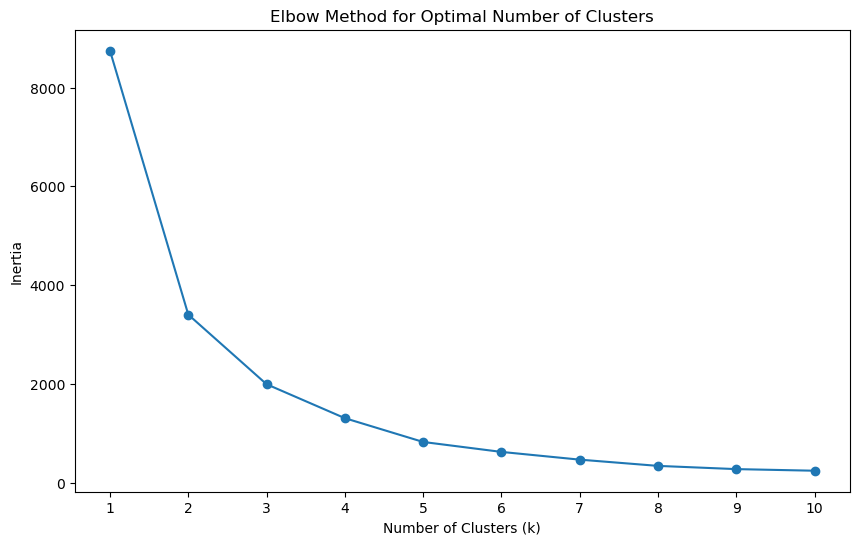

In [14]:
# Calculate inertia for a range of cluster values
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(customer_data[['Quantity', 'TotalPrice']])
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()


In [18]:
optimal_k = 4  # Replace with your chosen k from the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(customer_data[['Quantity', 'TotalPrice']])

KMeans(n_clusters=4, random_state=0)

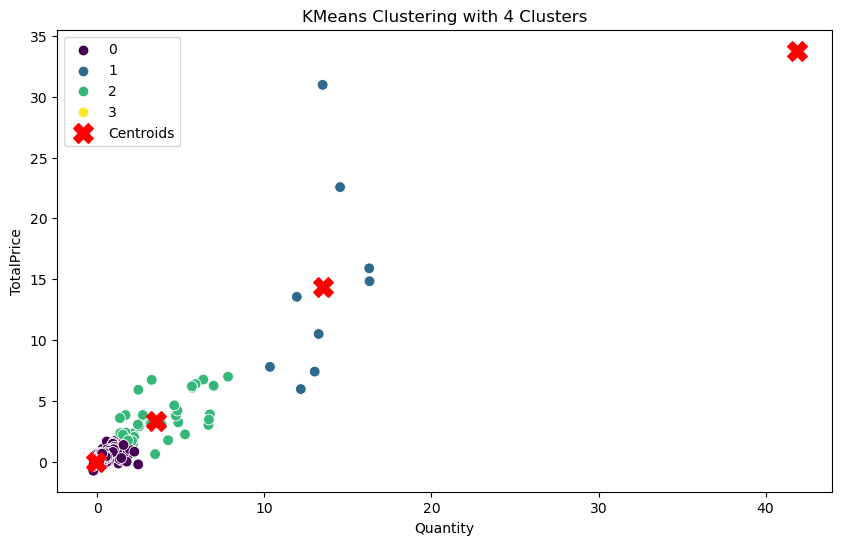

In [26]:
customer_data['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(customer_data['Quantity'], customer_data['TotalPrice'], c=customer_data['Cluster'], cmap='viridis')
sns.scatterplot(data=customer_data, x='Quantity', y='TotalPrice', hue='Cluster', palette='viridis', s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title(f'KMeans Clustering with {optimal_k} Clusters')
plt.xlabel('Quantity')
plt.ylabel('TotalPrice')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import silhouette_score

score = silhouette_score(customer_data[['Quantity', 'TotalPrice']], kmeans.labels_)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.9316355666842393
